# Universal Quantum Algorithms For MaxCut And Ising
This Notebook presents a performance demo of the algorithm presented in the paper <br/>
**Universal Quantum Algorithms For The Weighted Maximum Cut Problem And The Ising Model**.


Given an input graph the `MaxCut` class instance computes an outputs an approximate solution for the graph partitioning problem.


# Install
The code depends on the Python packages [numpy](https://numpy.org/install/), [networkx](https://networkx.org/documentation/stable/install.html), [qiskit](https://qiskit.org/documentation/stable/0.24/install.html) and [dwave](https://docs.ocean.dwavesys.com/projects/system/en/latest/installation.html).

- Please download the repository and install the requirements in `requirements.txt` or refer to the product pages for reference.

- Once you satisfied the dependency, run `pip install .` inside the directory.

You can now run the notebook!


## Import the `MaxCut` class

In [30]:
%matplotlib inline

In [31]:
from src.max_cut import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

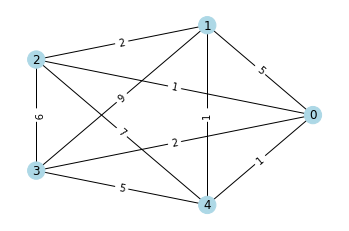

In [32]:
n = 5         # Graph size
p = (1., 0.)  # probability by wich (quadratic, unary) edges are generated.
entanglement = {1: None,
                2: 'bell',
                3: 'full',
                4: 'linear',
                5: 'circular'}   # Eventually add entanglement after the Ansatz
mc = MaxCut(n=n, p=p, entanglement=entanglement[1], brute_force=False, exact_costs=False)
mc.draw_graph()

## Plot the circuit

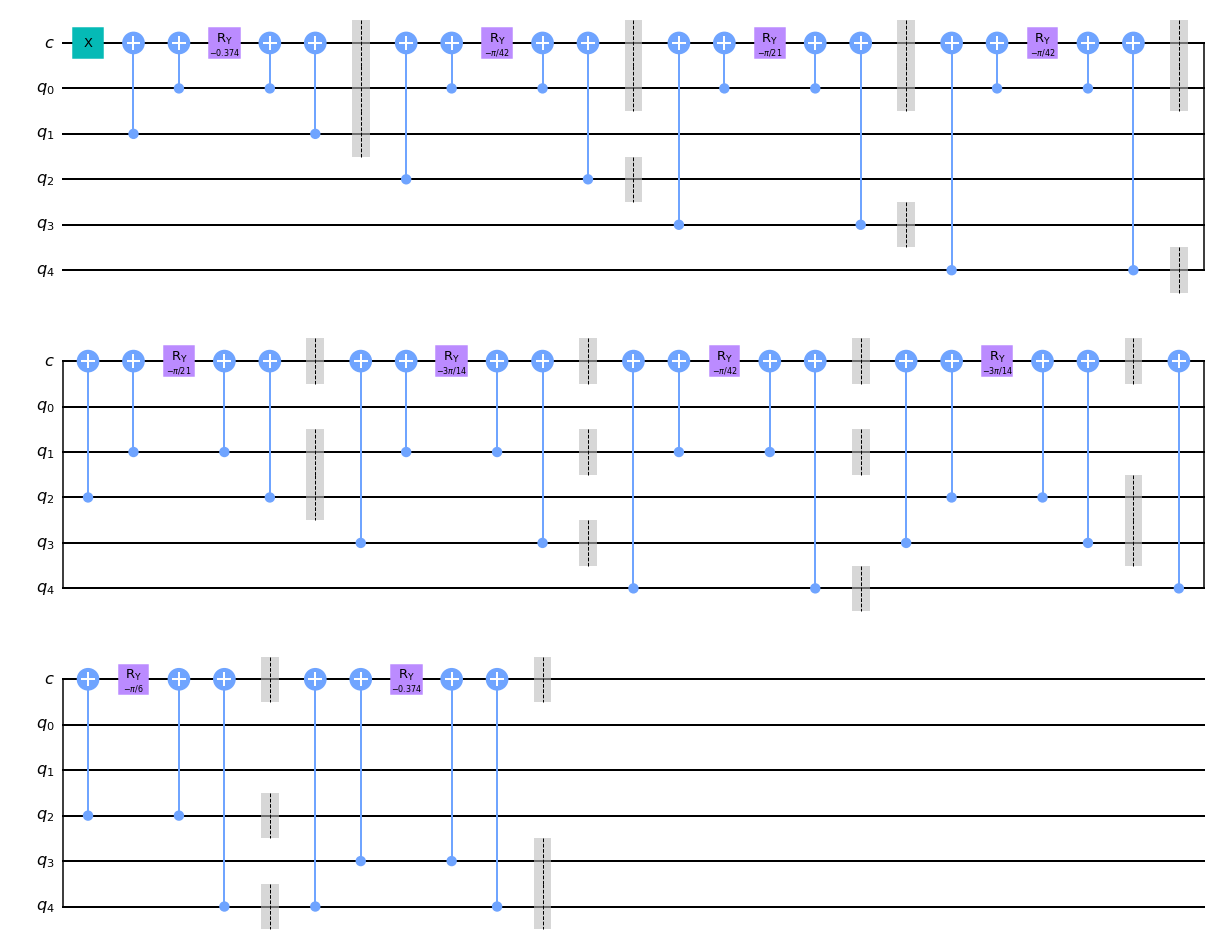

In [33]:
# Inspect the UQMaxCut circuit
mc._mc_circuit().draw(output='mpl')

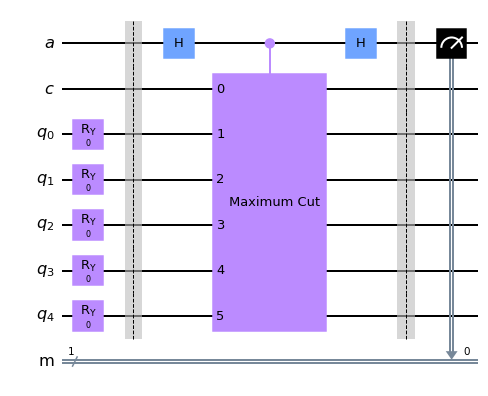

In [34]:
# Plot the complete circuit
mc.mc_circuit(mc.thetas_opt).draw(output='mpl')

## Optimize the Ansatzes parameters

In [35]:
gradient_method = {1: None,
                   2: 'parameter_shift',
                   3: 'finite_differences',
                   4: 'spsa'}    # Specify the optimization method
optimization_step = {1: 'vanilla',
                     2: 'adam'}  # Specify the step rule
mc.optimize(max_iter=20, alpha_const=1., backtracking=False, gradient_method=gradient_method[2],             optimization_step=optimization_step[1], fine_tuning=False)

PARAMETER SHIFT OPTIMIZATION
Iter 0   , alpha = 2.8   , norm_grad = 1.5       , cost = 0.7311    
Iter 1   , alpha = 2.77  , norm_grad = 11.93     , cost = -6.6323   
Iter 2   , alpha = 2.69  , norm_grad = 10.18     , cost = -8.4079   
Iter 3   , alpha = 2.56  , norm_grad = 10.46     , cost = -8.4601   
Iter 4   , alpha = 2.39  , norm_grad = 8.27      , cost = -13.0035  
Iter 5   , alpha = 2.18  , norm_grad = 9.27      , cost = -12.3768  
Iter 6   , alpha = 1.96  , norm_grad = 11.91     , cost = -13.4735  
Iter 7   , alpha = 1.72  , norm_grad = 10.47     , cost = -15.3535  
Iter 8   , alpha = 1.48  , norm_grad = 10.14     , cost = -16.659   
Iter 9   , alpha = 1.25  , norm_grad = 8.94      , cost = -15.9279  
Iter 10  , alpha = 1.03  , norm_grad = 6.39      , cost = -18.4346  
Iter 11  , alpha = 0.84  , norm_grad = 6.83      , cost = -19.218   
Iter 12  , alpha = 0.66  , norm_grad = 4.9       , cost = -18.9046  
Iter 13  , alpha = 0.52  , norm_grad = 5.9       , cost = -19.2702  
Iter 

## Get the results


MY RESULTS

Expected Cut =  [0, 3, 4] and [1, 2]
 or [1, 2] and [0, 3, 4]
       Obtained Cut: [1, 2] and [0, 3, 4]
Approximation Ratio: 0.99908447265625
Approximation Index: True
     Execution Time: 50.1677360534668 seconds


<Figure size 432x288 with 0 Axes>

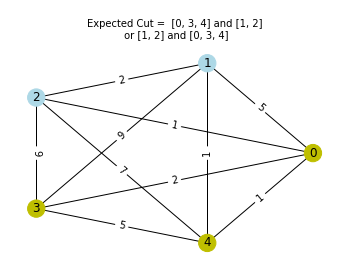

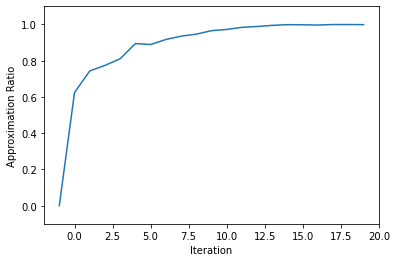

In [36]:
counts = mc.result()

## Plot Histogramm of counts results

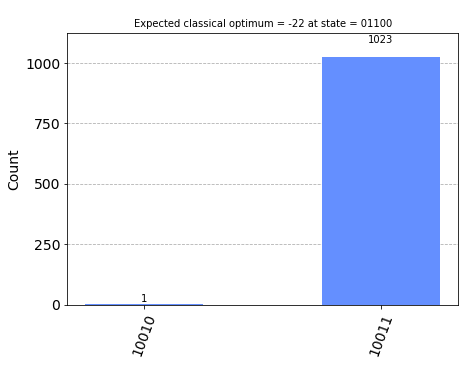

In [37]:
plot_histogram(counts,
               title=f'\nExpected classical optimum = {np.min(mc.costs)} '
                     f'at state = {np.binary_repr(np.argmin(mc.costs), width=mc.n)}')

# Citation
If you find this work useful, please cite the article [Article URL](#).
